<a href="https://colab.research.google.com/github/Guisversut/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Projeto de Data Science na Prática**
*by [Guilherme Sversut](https://www.linkedin.com/in/guilherme-sversut-22064515b/)*

---

# Análise dos Dados do Airbnb - *Austin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Austin - Texas, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Os dados foram obtidos diretamente da própria [Airbnb](http://insideairbnb.com/get-the-data.html).

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/tx/austin/2020-04-20/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* **id =** Código único para identificar o imóvel dentro do Airbnb
* **name =** Nome do imóvel, conforme cadastrado
* **host_id =** Código único para identificar o proprietário do imóvel
* **host_name =** Nome do proprietário do imóvel
* **neighbourhood_group	=** Grupo da vizinhança do imóvel
* **neighbourhood	=** Código relacionado a vizinhança daquele imóvel, porém não contém nenhum valor válido
* **latitude =** Coordenada da latitude do imóvel
* **longitude =** Coordenada da longitude do imóvel
* **room_type =** Tipo do imóvel
* **price =** Preço do aluguel do imóvel
* **minimun_nights =** Número mínimo de noites para reservar o imóvel
* **number_of_reviews =** Quantidade de avaliações sobre o imóvel
* **last_review =** Data da última avaliação do imóvel
* **reviews_per_month =** Quantidade de avaliações por mês
* **calculated_host_listings_count =** Quantidade de imóveis que o proprietário possui cadastrados
* **availability_365 =** Quantidade de dias disponíveis dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,30,24,2019-03-16,0.18,3,0
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,30,9,2018-03-14,0.07,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,532,2020-03-19,3.93,1,353
3,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,40,1,257,2019-11-03,2.10,1,25
4,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,112,2020-03-08,0.89,1,0


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11282
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                       int64
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A variável `neighbourhood_group` possui em sua coluna 100% dos valores faltando.
* As variáveis `reviews_per_month` e `last_review` possuem 21,67% dos valores faltando.
* A variável `host_name` possui quase 0% dos valores faltando.


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.216717
last_review                       0.216717
host_name                         0.000177
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

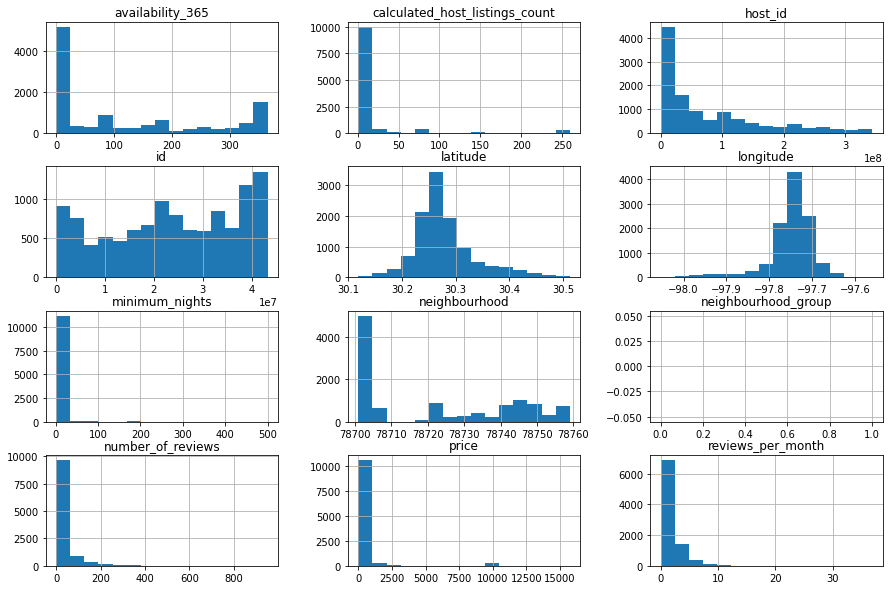

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Através do histograma acima é possível identificar alguns *outliers*, ou seja, pontos fora da curva, que normalmente irão atrapalhar nossa análise dos dados.

Alguns exemplos são nas variáveis: `price` e `minimum_nights`.

Para se confirmar `outliers` existem duas maneiras. Sendo elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [0]:
# ver o resumo estatístico das variáveis numéricas através do método describe()
df[['price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11282.000000,11282.000000,11282.000000,8837.000000,11282.000000,11282.000000
mean,500.400461,5.474384,31.316611,1.555486,14.366070,118.018259
std,1534.156893,17.169298,63.290581,1.911458,44.020925,136.854094
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,80.000000,1.000000,1.000000,0.240000,1.000000,0.000000
50%,145.000000,2.000000,7.000000,0.860000,1.000000,59.000000
75%,300.000000,3.000000,32.000000,2.260000,4.000000,239.000000
max,15728.000000,500.000000,951.000000,36.850000,259.000000,365.000000


A partir da análise do resumo estatístico acima, é possível se concluir alguns pontos:

* Na variável `minimum_nights`, a quantidade máxima de dias encontrada são de 500 dias, porém 75% das entradas são de no máximo 3 dias, enquanto que 50% das entradas são de no máximo 2 dias.
* A variável `price` está um pouco bagunçada, pois o valor mínimo encontrado foi de 0 enquanto que o maior foi de 15728, atrapalhando assim sua média (`mean`). Porém analisando 75% dos valores encontrados, podemos notar que o valor médio na verdade gira em torno de 300.

#### Boxplot para minimum_nights

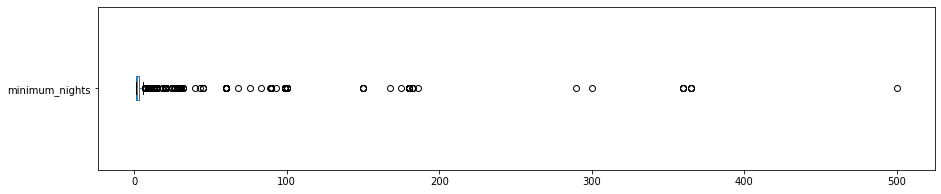

minimum_nights: valores acima de 30
183 entradas
1.6221%


In [0]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format(len(df[df.minimum_nights > 30]) / df.shape[0]*100))

#### Boxplot para price

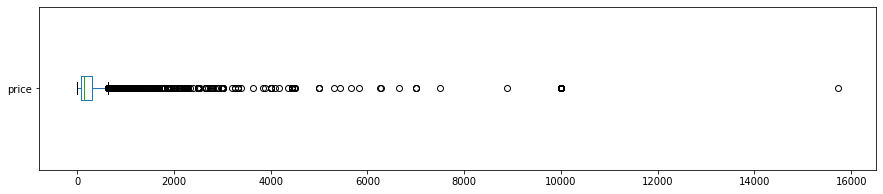

price: valores acima de 1000
681 entradas
6.0362%


In [0]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver a quantidade de preços acima de 1000
print("price: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format(len(df[df.price > 1000]) / df.shape[0]*100))

#### Histogramas em *outliers*

Como foram identificados *outliers* nas variáveis `price` e `minimum_nights`, iremos limpar o *DataFrame* destas e plotar o histograma novamente.

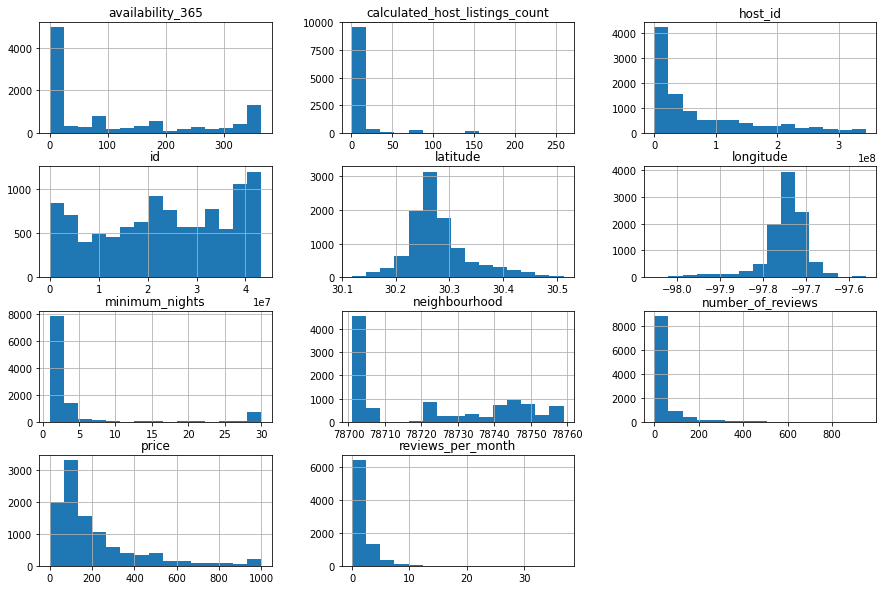

In [0]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourgood_group`, pois o mesmo está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [0]:
# ver a média da coluna `price`
print('A média é: {}'.format(df_clean.price.mean()))


A média é: 210.77283596365376


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas.

Esta pode ser medida e é função do coeficiente de correlação estabelecer a intensidade entre elas.

Para identificar as correlações existentes vamos:
* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [0]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.123401,-0.121075,-0.128932,0.131421,0.130025
minimum_nights,-0.123401,1.000000,-0.076560,-0.153767,0.033399,0.138597
number_of_reviews,-0.121075,-0.076560,1.000000,0.659556,-0.040558,0.142938
reviews_per_month,-0.128932,-0.153767,0.659556,1.000000,0.030350,0.130184
calculated_host_listings_count,0.131421,0.033399,-0.040558,0.030350,1.000000,0.218288
availability_365,0.130025,0.138597,0.142938,0.130184,0.218288,1.000000


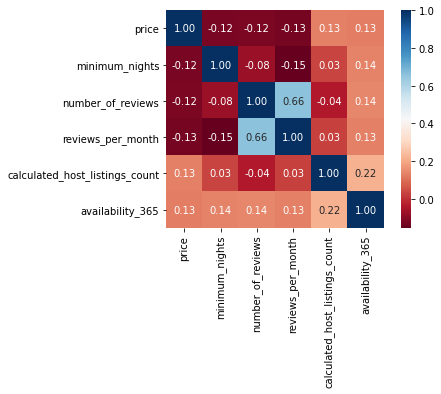

In [0]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Para responder esta pergunta vamos utilizar o método `value_counts()`.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7758
Private room       2509
Shared room         155
Hotel room           33
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.742037
Private room       0.239981
Shared room        0.014825
Hotel room         0.003156
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



Utilizando `groupby()` é possível se verificar uma variável em funcão de uma outra. Sendo assim iremos comparar os bairros (*neighbourhoods*) a partir de seus preços.

In [0]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
78732    356.324324
78701    300.072485
78746    291.633621
78730    286.678571
78703    266.098837
78734    261.033493
78702    258.657226
78704    255.456446
78739    247.653846
78712    243.333333
Name: price, dtype: float64

Com os dados da longitude e da latitude é possível plotar cada imóvel.

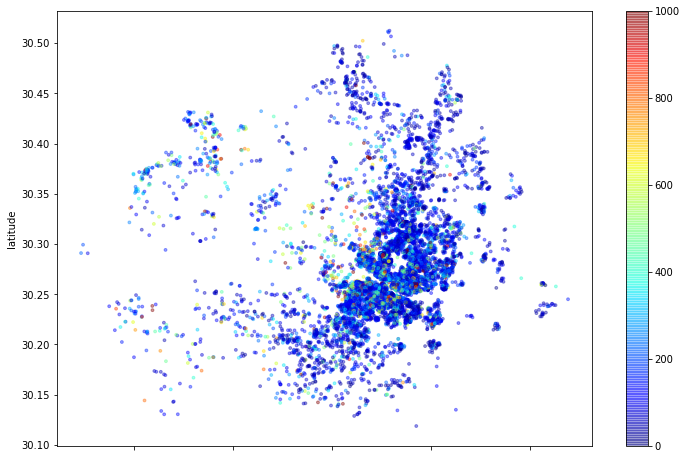

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [0]:
# ver a média da coluna `minimum_nights`
print('A média é: {}'.format(df_clean.minimum_nights.mean()))

A média é: 4.109325681492109


## Conclusões


A partir da análise do Dataset foi possível notar uma grande dispersão de imóveis em Austin - Texas.

Além do mais também notamos alguns *outliers* relacionados principalmente ao preço e ao número mínimo de noites para aluguel dos imóveis.

Mesmo este sendo um projeto inicial para Data Science no qual apenas foram analisados alguns dados resumidos do Airbnb, foi muito importante para se ter uma ideia do alcance e do que realmente é Data Science na prática.